In [435]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.metrics import mean_squared_error

In [436]:
def demean(X):
    for i in range(X.shape[1]):
        X[:, i] = X[:, i] - np.mean(X[:, i])
    return X

In [437]:
def remean(X, data):
    for i in range(X.shape[1]):
        X[:, i] = X[:, i] + np.mean(data[:, i])
    return X

In [438]:
def dro(X, d):
    X = demean(X)
    u, s, vh = np.linalg.svd(X)

    Z = u[:, :d]
    R = np.matmul(u[:, :d], (vh[:d, :].T * s[:d]).T)  
          
    return Z, R

In [439]:
def buggy_PCA(X, d):
    u, s, vh = np.linalg.svd(X)

    Z = np.matmul(X, vh[:d, :].T)

    return Z, np.matmul(Z, vh[:d])

In [440]:
def demeaned_PCA(X, d):
    return buggy_PCA(demean(X),  d)

In [461]:
def normalized_PCA(X, d):
    X = demean(X)
    X_norm = np.copy(X)
    
    for i in range(X.shape[1]):
        X_norm[:, i] = X_norm[:, i] / np.std(X[:, i])
    
    Z, R = buggy_PCA(X_norm, d)

    for i in range(X.shape[1]):
        R[:, i] = R[:, i] * np.std(X[:, i])

    return Z, R

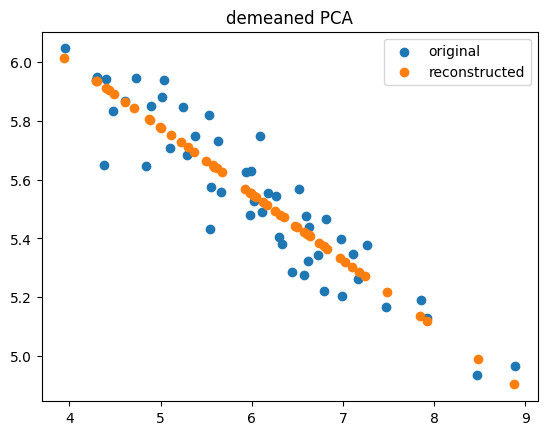

0.005003042814256451


In [476]:
data = genfromtxt("data/data2D.csv", delimiter=",")
X = np.copy(data)
Z, R = demeaned_PCA(X, 1)
R = remean(R, data)
plt.scatter(data[:, 0], data[:, 1], label='original')
plt.scatter(R[:, 0], R[:, 1], label='reconstructed')
# plt.scatter(Z, np.zeros([50]))
plt.title('demeaned PCA')
plt.legend()
plt.show()
print(mean_squared_error(data, R))




In [443]:
"""
buggy_PCA: 0.8869030837347942
demeaned_PCA: 0.010006085628512902
normalized_PCA: 0.04947208345477068
DRO: 0.010006085628512902
"""

'\nbuggy_PCA\ndemeaned_PCA: 0.005003042814256451\nnormalized_PCA: 0.030657181711908538\nDRO: 0.005003042814256451\n'

In [469]:
data = genfromtxt("data/data1000D.csv", delimiter=",")
X = np.copy(data)
Z, R = dro(X, 30)
R = remean(R, data)
print(mean_squared_error(data, R))

0.2730459589786028


In [445]:
"""
buggy_PCA: 1.605462797240717
demeaned_PCA: 0.5460919179572056
normalized_PCA: 0.5472571619952466
DRO: 0.5460919179572056
"""

'\nbuggy_PCA\ndemeaned_PCA: 0.27304595897860284\nnormalized_PCA: 0.030657181711908538\nDRO: 28.021361212827088\n'

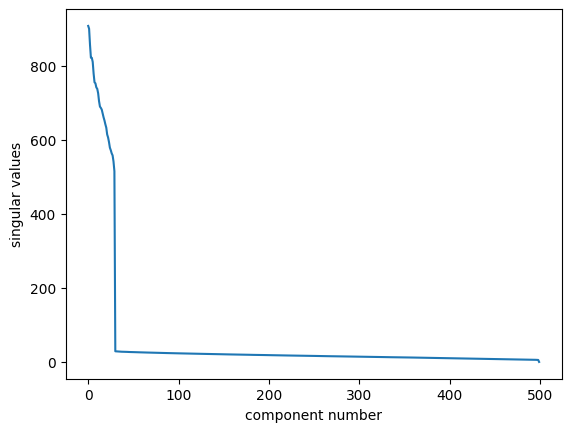

[9.06944618e+02 8.99347183e+02 8.56076283e+02 8.21124899e+02
 8.20941909e+02 8.09725103e+02 7.78287025e+02 7.54747926e+02
 7.52025322e+02 7.40945148e+02 7.37311909e+02 7.25317273e+02
 7.03714353e+02 6.89223149e+02 6.85707405e+02 6.81073486e+02
 6.70649100e+02 6.60404143e+02 6.51842805e+02 6.41349697e+02
 6.32373122e+02 6.13864407e+02 6.05868033e+02 5.93571322e+02
 5.78347228e+02 5.71368731e+02 5.62886549e+02 5.57535429e+02
 5.41100841e+02 5.14786013e+02 2.87259008e+01 2.85120739e+01
 2.81959508e+01 2.80560462e+01 2.79991410e+01 2.77824398e+01
 2.77017621e+01 2.75286948e+01 2.74936594e+01 2.74401571e+01
 2.72902562e+01 2.72492343e+01 2.71350084e+01 2.70841984e+01
 2.69141735e+01 2.68692938e+01 2.67396137e+01 2.67087864e+01
 2.65392776e+01 2.64877420e+01 2.64570125e+01 2.63973391e+01
 2.63338370e+01 2.62486277e+01 2.60961398e+01 2.60634331e+01
 2.59133949e+01 2.59096981e+01 2.58061992e+01 2.57893736e+01
 2.57328049e+01 2.56564097e+01 2.56246685e+01 2.55343445e+01
 2.53935575e+01 2.534668

30

In [470]:
data = genfromtxt("data/data1000D.csv", delimiter=",")
_, s, _ = np.linalg.svd(demean(data), full_matrices=False)
plt.plot(range(s.shape[0]), s)
plt.xlabel("component number")
plt.ylabel("singular values")
plt.show()
print(s)
sum(1 for x in s if x > 200)
